In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Financial Analytics data.csv")

In [3]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [4]:
df.tail()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
483,496,Lak. Vilas Bank,3029.57,790.17
484,497,NOCIL,3026.26,249.27
485,498,Orient Cement,3024.32,511.53
486,499,Natl.Fertilizer,3017.07,2840.75
487,500,L T Foods,NaN,NaN


In [5]:
df.shape

(488, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


In [7]:
df.drop(columns='S.No.',inplace=True)

In [8]:
df.head()

,Name,Mar Cap - Crore,Sales Qtr - Crore
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51


In [9]:
df.isnull().sum()

Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    29
dtype: int64

In [10]:
df.describe()

,Mar Cap - Crore,Sales Qtr - Crore
count,479.000000,459.000000
mean,28043.857119,3807.789412
std,59464.615831,9989.449987
min,3017.070000,0.000000
25%,4843.575000,534.910000
50%,9885.050000,1137.170000
75%,23549.900000,2730.195000
max,583436.720000,110666.930000


In [14]:
df['Sales Qtr - Crore'] = df['Sales Qtr - Crore'].fillna(df['Sales Qtr - Crore'].median()) 

In [18]:
df.isnull().sum()

Name                 0
Mar Cap - Crore      9
Sales Qtr - Crore    0
dtype: int64

In [19]:
df['Mar Cap - Crore'] = df['Mar Cap - Crore'].fillna(df['Mar Cap - Crore'].median()) 

In [20]:
df.isnull().sum()

Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,488,488,Reliance Inds.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mar Cap - Crore,488.0,NaN,NaN,NaN,27708.961086,58963.329098,3017.07,4879.6125,9885.05,23400.815,583436.72
Sales Qtr - Crore,488.0,NaN,NaN,NaN,3649.08457,9708.054143,0.0,570.035,1137.17,2580.7975,110666.93


<Axes: xlabel='Sales Qtr - Crore'>

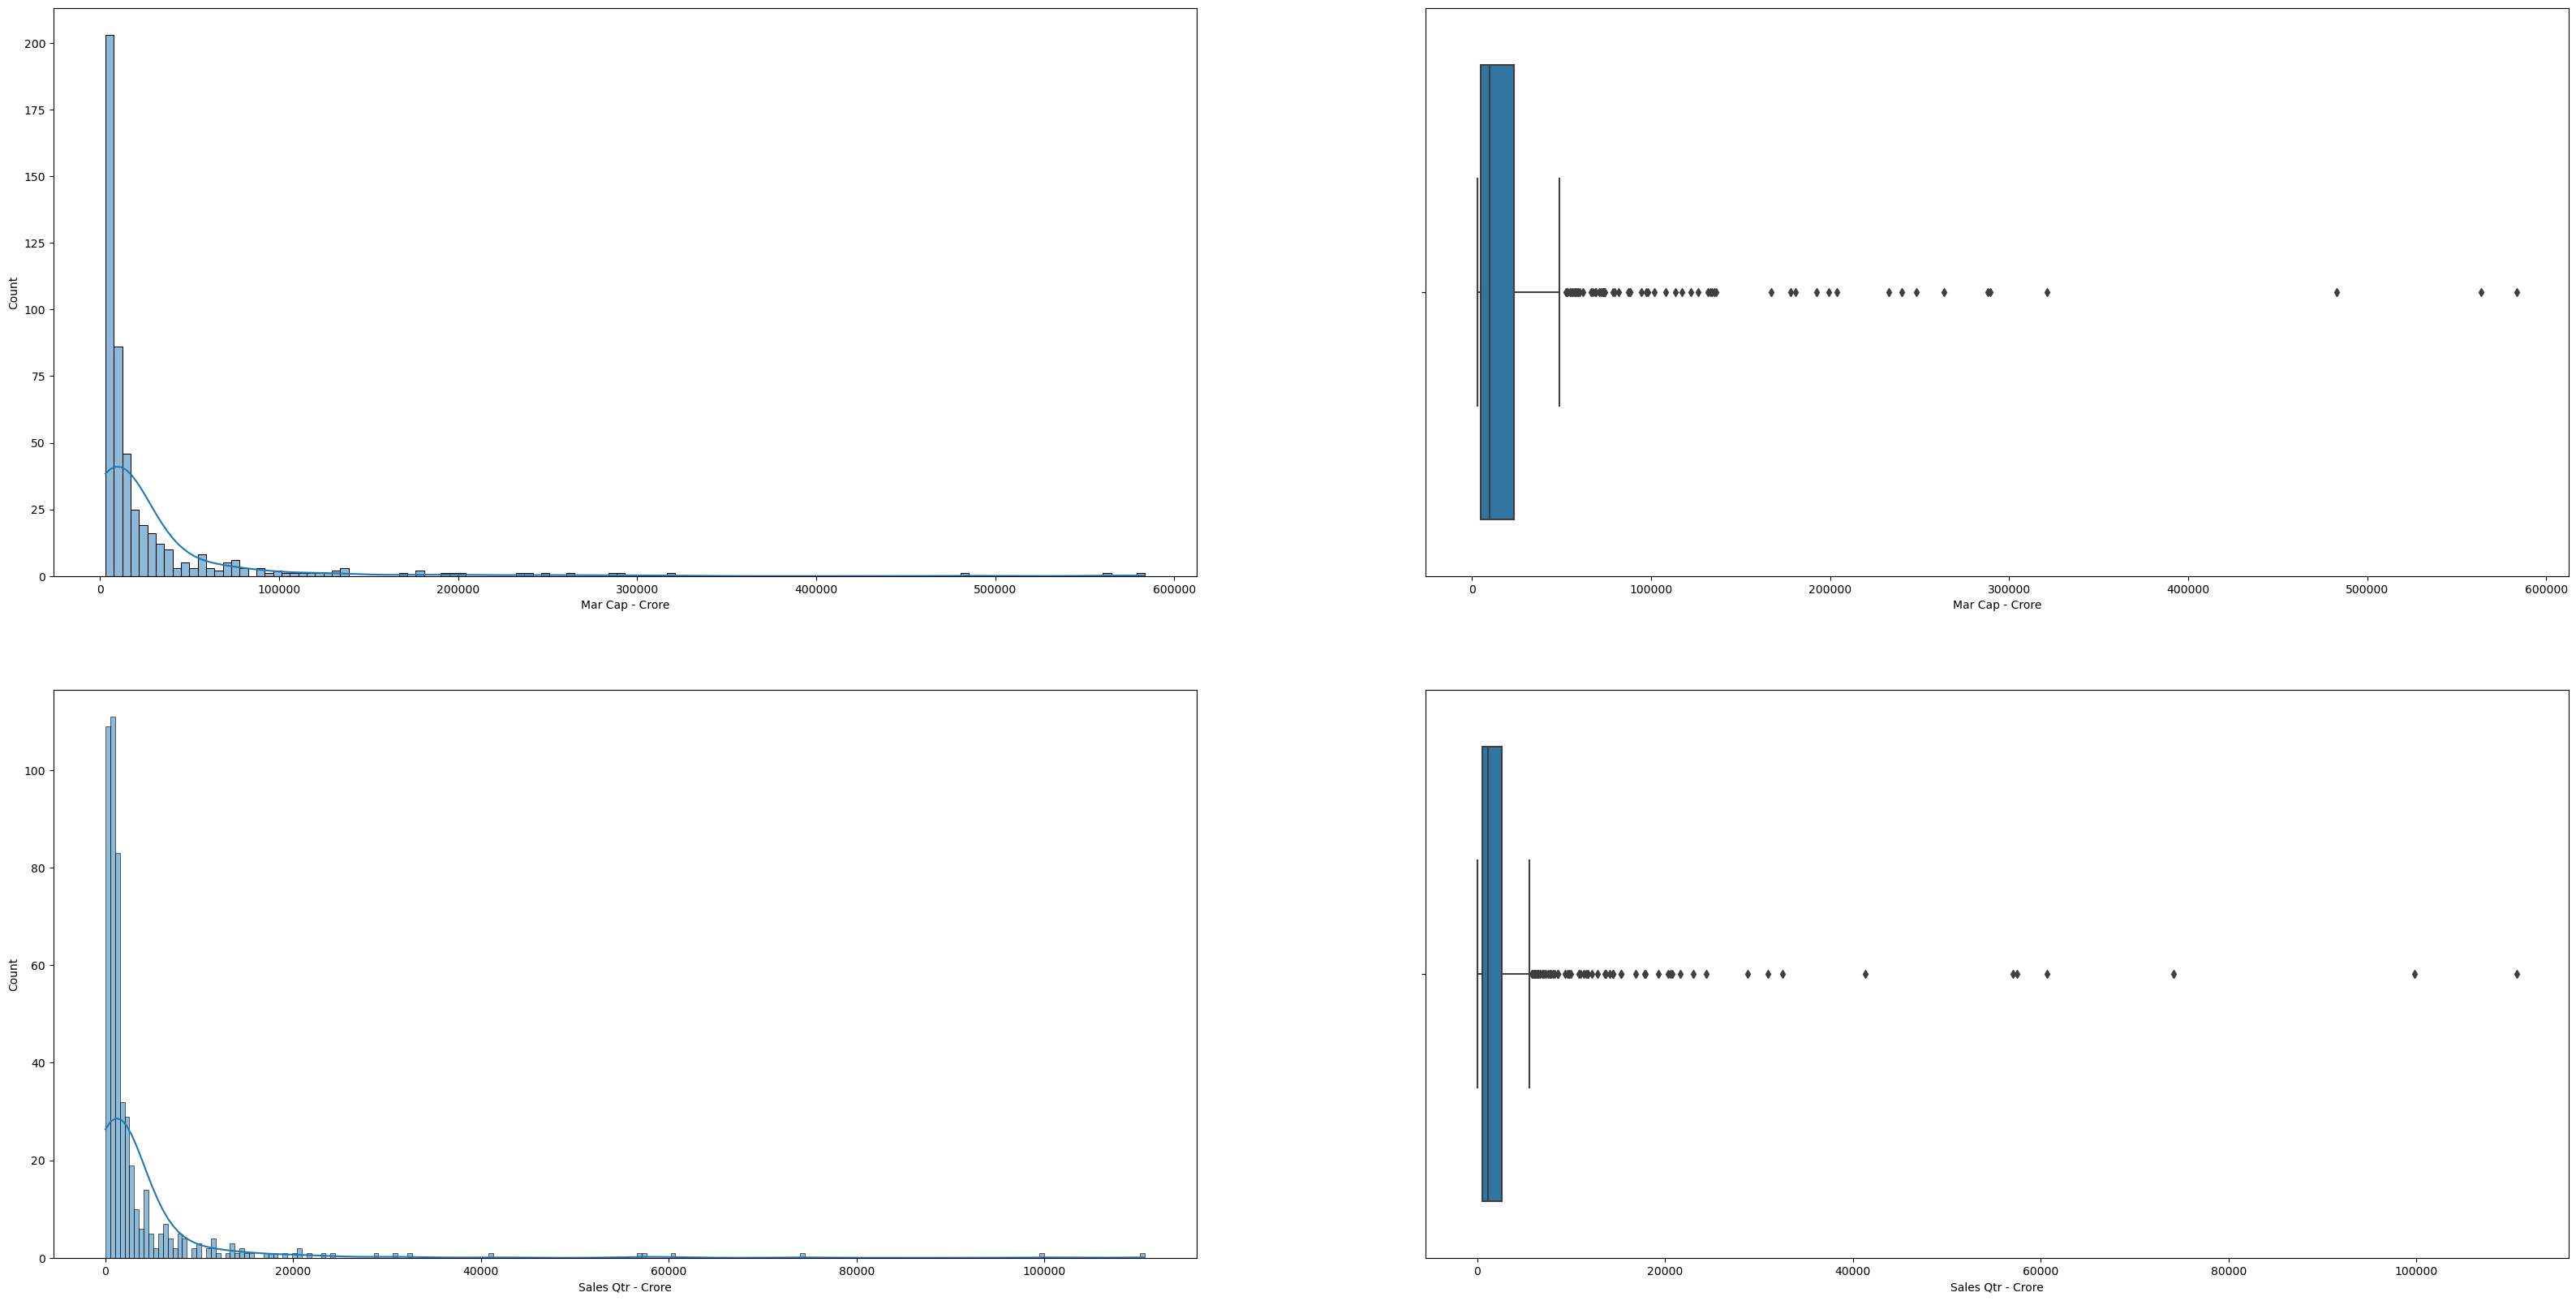

In [38]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(40,20))
sns.histplot(df['Mar Cap - Crore'],kde=True,ax=axes[0][0])
sns.boxplot(x='Mar Cap - Crore',data=df,ax=axes[0][1])
sns.histplot(df['Sales Qtr - Crore'],kde=True,ax=axes[1][0])
sns.boxplot(x='Sales Qtr - Crore',data=df,ax=axes[1][1])

<Axes: xlabel='Sales Qtr - Crore', ylabel='Count'>

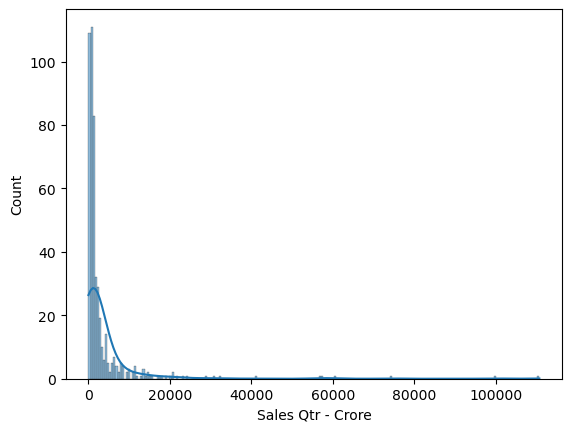

In [23]:
sns.histplot(df['Sales Qtr - Crore'],kde=True)

<Axes: xlabel='Mar Cap - Crore', ylabel='Count'>

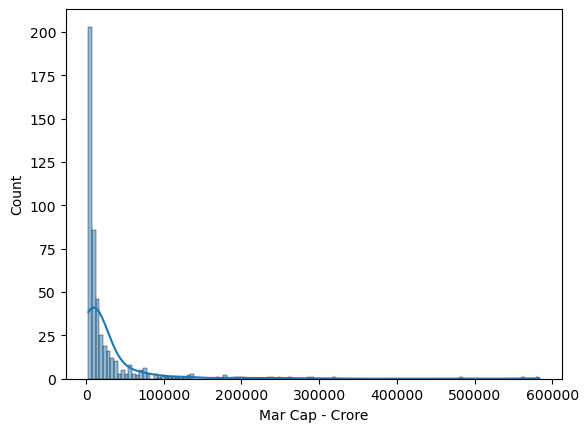

In [24]:
sns.histplot(df['Mar Cap - Crore'],kde=True)

<Axes: xlabel='Mar Cap - Crore'>

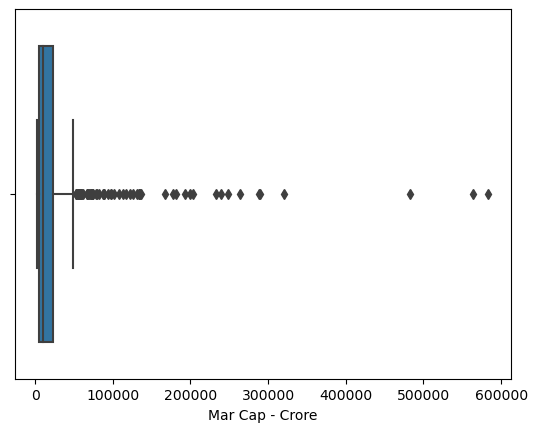

In [26]:
sns.boxplot(x='Mar Cap - Crore',data=df)

<Axes: xlabel='Sales Qtr - Crore'>

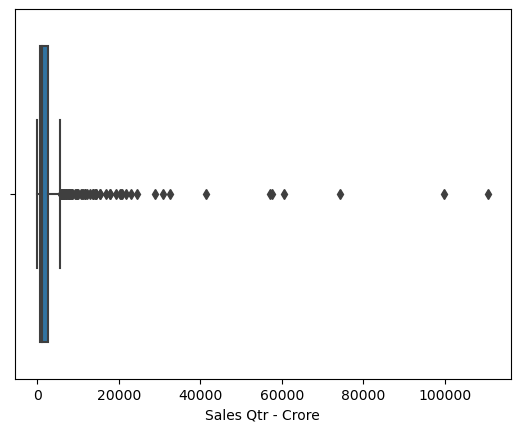

In [27]:
sns.boxplot(x='Sales Qtr - Crore',data=df)

C:\Users\THANUSRI\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


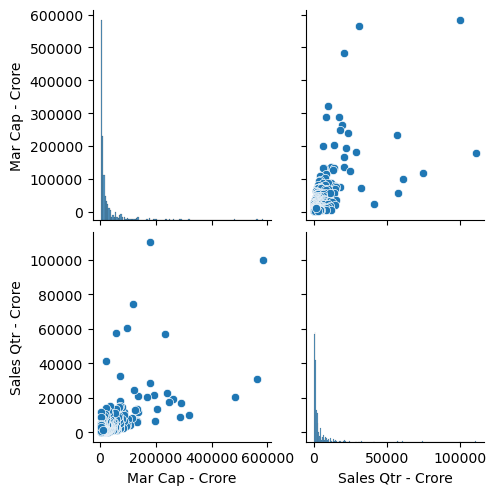

In [28]:
sns.pairplot(df)

In [30]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Name']
['Mar Cap - Crore', 'Sales Qtr - Crore']


<Axes: >

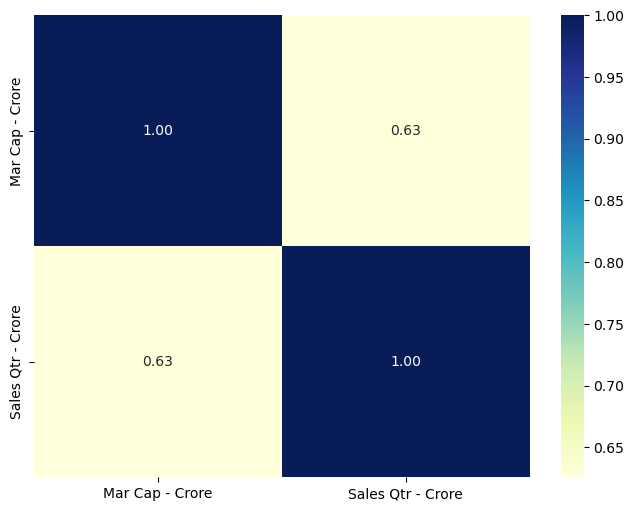

In [31]:
df_cor=df[num].corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt='.2f', cmap='YlGnBu')